## Impact of number of metrics
### dataset
### algo

In [1]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import json
import os

from result_plots.QuerySketch.common.common import read_data, get_metric_mapping
from result_plots.QuerySketch.common.process_data_from_solver import get_mean_from_iterations, normalize_error_result, get_ensemble_error
from result_plots.QuerySketch.common.plot import get_result_from_pkl, get_x_position, get_xtick_position, \
                                                plot_raw, get_gain, gain_over_strawman, consolidate_gain_over_strawman

## Common variables

In [10]:
# seeds = [1, 2, 3, 4, 5]
# count = 1

# flowkeys = ["srcIP",]
# epochs = ['30']
# # same dataset
# datasets = ['equinix-nyc.dirA.20180517-130100.UTC.anon.pcap/', 'equinix-nyc.dirA.20180517-130500.UTC.anon.pcap/', 'equinix-nyc.dirA.20180517-131000.UTC.anon.pcap/', 
#             'equinix-nyc.dirA.20180517-133000.UTC.anon.pcap/', 'equinix-nyc.dirA.20180517-140000.UTC.anon.pcap/', 
#             'equinix-nyc.dirA.20180621-130100.UTC.anon.pcap/', 'equinix-nyc.dirA.20180621-130500.UTC.anon.pcap/', 'equinix-nyc.dirA.20180621-131000.UTC.anon.pcap/', 
#             'equinix-nyc.dirA.20180621-133000.UTC.anon.pcap/', ]

isSaveFig = False

random_runs = 5

In [3]:
# metric = 'card'
# metric = 'hh' # not yet run
# metric = 'fsd' # not yet run

# mem_size = 4096

metric = 'ensemble'
mem_size = 16384

name = f'{metric}_mem_{mem_size}'

## Impact of number of pcaps (same dataset)

In [4]:
def organize_plot_data(metric, mem_size, random_runs):
    l1 = []
    for runs in range(random_runs):
        filename = f'results/figure_data/num_of_pcaps/runs_{runs}/{metric}/mem_{mem_size}.json'
        with open(filename) as f:
            data = json.load(f)
            l1.append(data)

    # for d in l1:
    #     print(d)
    
    ## transpose l1 to l2
    l2 = []
    for j in range(len(l1[0])):
        l2.append([])
        for i in range(len(l1)):
            l2[j].append(l1[i][j])
    # print()
    # for d in l2:
    #     print(d)
    return l2

In [5]:
plot_data = organize_plot_data(metric, mem_size, random_runs)

In [6]:
## Plot raw result
def boxplot_impact_pcap(data, name, isSaveFig = False):
    ## comparison version plot
    # box plot 
    # https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/
    # Box plots with custom fill colors
    # https://matplotlib.org/stable/gallery/statistics/boxplot_color.html

    import matplotlib.patches as mpatches

    xlabels = ['2', '6', '10', '14', '18']
    data_len = len(data)
    colors = ['royalblue']
    # colors = ['deeppink', 'darkred', 'royalblue', 'darkblue']
    colors = colors * data_len

    fig = plt.figure(figsize = (10, 6))
    # Creating axes instance
    ax = fig.add_axes([0, 0, 1, 1])
    
    ax.set_ylim([0, 80])

    # Creating plot
    bplot = ax.boxplot(x=data, 
                       positions = get_x_position(data_len, 1),
                       patch_artist=True) # , showfliers=False
    # ax.set_xlim(0, 1)

    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

    # plt.axhline(y = 0, color = 'r', linestyle = '--')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.grid()
    
    plt.ylabel("Error reduction (%)", fontsize=32)
    plt.xlabel("Number of epochs on profile", fontsize=32)
    plt.xticks(get_x_position(data_len, 1), xlabels, fontsize=30)
    plt.yticks(fontsize=30)

    # plt.title(f"Impact of number of traces used for profiling - {name}", fontsize=18)

    # # create legends
    # legend_labels = ['over Random-Uniform', 'over Random-Proportional', 
    #                 'over Lazy-Uniform', 'over Lazy-Proportional']
    # legend_patch = []
    # legend_patch.append(mpatches.Patch(color=colors[0], label=legend_labels[0]))
    # legend_patch.append(mpatches.Patch(color=colors[1], label=legend_labels[1]))
    # legend_patch.append(mpatches.Patch(color=colors[2], label=legend_labels[2]))
    # legend_patch.append(mpatches.Patch(color=colors[3], label=legend_labels[3]))
    # plt.legend(handles=legend_patch, fontsize=22, frameon=False, ncol=2) # , loc="upper right"

    # import pickle
    # with open(f'pickles/{name}.pkl', 'wb') as fout:
    #     pickle.dump(fig, fout)
    output_dir = './figures/profiler_caida_num_of_pcaps/output/'
    if isSaveFig:    
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
        
        plt.savefig(f'{output_dir}/{name}.pdf', format='pdf', bbox_inches='tight')

    # show plot
    plt.show()

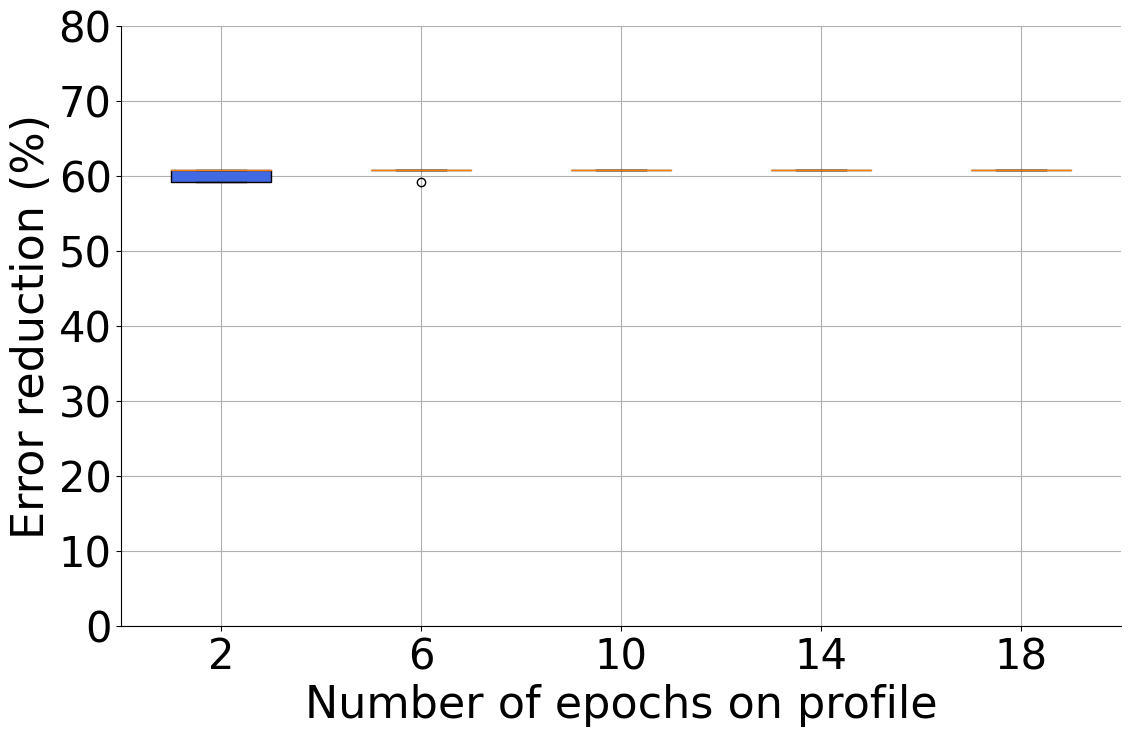

In [7]:
boxplot_impact_pcap(plot_data, name, isSaveFig)

In [8]:
# ## Plot raw result
# def plot_num_of_pcaps_with_specific_strawman(data, labels, name, strawman_idx = 0, isSaveFig = False):
#     ## comparison version plot
#     # box plot 
#     # https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/
#     # Box plots with custom fill colors
#     # https://matplotlib.org/stable/gallery/statistics/boxplot_color.html

#     import matplotlib.patches as mpatches

#     xlabels = labels
    
#     num_of_strawmen = 4
#     data_len = int(len(data) / num_of_strawmen) # 4 strawmen
    
#     colors = ['deeppink']
#     colors = colors * data_len
#     # colors = ['deeppink', 'darkred', 'royalblue', 'darkblue', 'darkgreen']
    
#     plot_data = []
#     for i in range(data_len):
#         idx = i * num_of_strawmen + strawman_idx
#         # print(idx)
#         plot_data.append(data[idx])

#     fig = plt.figure(figsize = (10, 6))
#     # Creating axes instance
#     ax = fig.add_axes([0, 0, 1, 1])
    
#     ax.set_ylim([70, 100])

#     # Creating plot
#     bplot = ax.boxplot(x=plot_data, 
#                        positions = get_x_position(data_len, 1),
#                        patch_artist=True) # , showfliers=False
#     # ax.set_xlim(0, 1)

#     for patch, color in zip(bplot['boxes'], colors):
#         patch.set_facecolor(color)

#     # plt.axhline(y = 0, color = 'r', linestyle = '--')
#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
#     plt.grid()
    
#     plt.ylabel("Error reduction (%)", fontsize=28)
#     plt.xlabel("Number of traces on training", fontsize=28)
#     # plt.xticks(get_xtick_position(data_len, 1), xlabels, fontsize=26)
#     plt.xticks(get_x_position(data_len, 1), xlabels, fontsize=26)
#     plt.yticks(fontsize=26)

#     # plt.title(f"Impact of memory - {name}", fontsize=18)

#     # import pickle
#     # with open(f'pickles/{name}.pkl', 'wb') as fout:
#     #     pickle.dump(fig, fout)
#     # plt.savefig('figures/profiling_interval.pdf', format='pdf', bbox_inches='tight')

#     # show plot
#     plt.show()

### Save plot data as json

In [9]:
# Save data as json
isDumpJson = False

if isDumpJson:
    # save gain result
    ll = []
    for arr in global_merge_gain_all_num_of_pcap:
        ll.append(arr.tolist())
    with open('results/figure_data/impact_of_profiling_cost.json', 'w') as out:
        json.dump(ll, out)
        
    # save ensemble error
    ll = []
    for arr in global_ensemble_error:
        ll.append(arr.tolist())
    with open('results/figure_data/impact_of_profiling_cost.json', 'w') as out:
        json.dump(ll, out)